In [13]:
from sklearn import preprocessing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 

In [4]:
fraud = pd.read_csv("Fraud_check.csv")
fraud
Fraud =fraud.rename(columns={"Marital.Status":'MaritalStatus','Taxable.Income':'Taxable_Income',"City.Population":'CityPopulation','Work.Experience':'WorkExperience'})
Fraud 

,Undergrad,MaritalStatus,Taxable_Income,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5fe403c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5fe41b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5fe4038b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5fe41b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5fe41bd30>],
 'means': []}

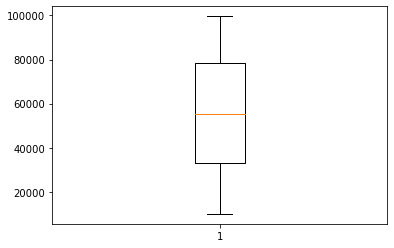

In [5]:
plt.boxplot(Fraud['Taxable_Income'])

In [6]:
Data = pd.get_dummies(Fraud)
Data 

,Taxable_Income,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [7]:
df = Data.drop(['MaritalStatus_Single', 'MaritalStatus_Divorced', 'Undergrad_NO', 'Urban_NO'], axis=1)

In [8]:
df.loc[df['Taxable_Income'] <= 30000 , 'Category'] = 'Risky'  
df.loc[df['Taxable_Income'] >= 30000 , 'Category'] = 'Good'  
df1= df.drop(columns='Taxable_Income')
df1 

,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,Urban_YES,Category
0,50047,10,0,0,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,0,1,Good
4,27533,28,0,1,0,Good
...,...,...,...,...,...,...
595,39492,7,1,0,1,Good
596,55369,2,1,0,1,Good
597,154058,0,0,0,1,Good
598,180083,17,1,1,0,Good


<AxesSubplot:xlabel='WorkExperience', ylabel='Category'>

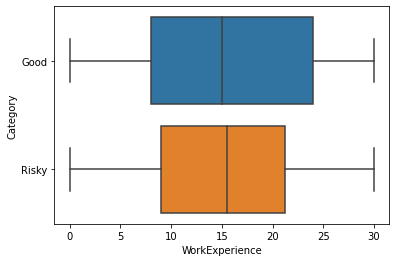

In [9]:
import seaborn as sns
sns.boxplot(x='WorkExperience', y='Category', data = df1 )

In [10]:
DF = df1.rename(columns={'Undergrad_YES':'Undergrad','MaritalStatus_Married':'MaritalStatus','Urban_YES':'Urban','Category':'Taxable_Income'})
DF 

,CityPopulation,WorkExperience,Undergrad,MaritalStatus,Urban,Taxable_Income
0,50047,10,0,0,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,0,1,Good
4,27533,28,0,1,0,Good
...,...,...,...,...,...,...
595,39492,7,1,0,1,Good
596,55369,2,1,0,1,Good
597,154058,0,0,0,1,Good
598,180083,17,1,1,0,Good


In [11]:
DF.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [16]:
label_encoder = preprocessing.LabelEncoder()
DF['Taxable_Income']= label_encoder.fit_transform(DF['Taxable_Income']) 

In [17]:
x =  DF.iloc[:,0:5]
x

,CityPopulation,WorkExperience,Undergrad,MaritalStatus,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [18]:
y = DF['Taxable_Income']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Income, Length: 600, dtype: int32

In [19]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2) 

In [20]:
y_train.value_counts()

y_test.value_counts()

0    94
1    26
Name: Taxable_Income, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7625

In [22]:
##Predicting on training data
pred_train = model.predict(x_train)
pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [23]:
##Accuracy on training data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)


1.0

In [24]:
pd.crosstab(y_train,pred_train)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable_Income,,
0,382,0
1,0,98


In [25]:
#Prediction on test data
pred_test = model.predict(x_test)
pred_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [26]:
accuracy_score(y_test,pred_test)
#Accuracy on test data 

0.7333333333333333

In [27]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df2 

,Actual,Predicted
553,0,0
54,0,0
345,0,0
263,0,0
567,1,0
...,...,...
101,0,0
65,0,1
45,0,0
565,0,0


In [28]:
pd.crosstab(y_test,pred_test)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable_Income,,
0,85,9
1,23,3


In [ ]:
#Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%

In [ ]:
# As seen from the cross tab, 90 predictions are correct and the remaining are not predicted correctly